SIGN LANGUAGE RECOGNITION

Group 7 :

Anar Shikhaliyev, Asmar Khalilli, Sabina Abdyeva, Vugar Mammadov


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
import shutil
import scipy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [3]:
# # EXECUTE ONLY ONCE
# # Creating Train / Val / Test folders
root_dir = './'

# create folder in root directory
for folder in os.listdir("ASL"):
    os.makedirs(root_dir +'/train/' + folder)
    os.makedirs(root_dir +'/test/' + folder)
    os.makedirs(root_dir +'/validation/' + folder)



# Creating partitions of the data after shuffeling
for folderName in os.listdir("ASL"):
    currentCls = folderName
    src = "ASL/"+currentCls+"/" # Folder to copy images from

    allFileNames = os.listdir(src)

    np.random.shuffle(allFileNames)
    train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                            [int(len(allFileNames)*0.7), int(len(allFileNames)*0.85)])


    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
    val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
    test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

    print('Total images: ', len(allFileNames))
    print('Training: ', len(train_FileNames))
    print('Validation: ', len(val_FileNames))
    print('Testing: ', len(test_FileNames))

    # Copy-pasting images
    for name in train_FileNames:
        shutil.copy(name, "./train/"+currentCls)

    for name in val_FileNames:
        shutil.copy(name, "./validation/"+currentCls)

    for name in test_FileNames:
        shutil.copy(name, "./test/"+currentCls)

Total images:  4000
Training:  2800
Validation:  600
Testing:  600
Total images:  4000
Training:  2800
Validation:  600
Testing:  600


In [3]:
train_path = './train'
test_path = './test'
classes = 2 # number of classes, 26 in normal case, but we trained on 4 classes 
img_size = 64 # 64x64 pixels

train_batches = ImageDataGenerator (
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=False,
    fill_mode='nearest' ).flow_from_directory (
        train_path,
        target_size=(img_size, img_size),
        batch_size=23,
        color_mode = 'grayscale',
        class_mode='categorical',
        shuffle=True )

test_batches = ImageDataGenerator(
    rescale=1./255 ).flow_from_directory (
        test_path,
        target_size=(img_size, img_size),
        batch_size=32,
        color_mode = 'grayscale',
        class_mode='categorical',
        shuffle=True )

Found 5600 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


In [4]:
model = Sequential()

# 1st Convolution layer
model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape=(img_size, img_size ,1) ))
# Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution layer
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# 3rd Convolution layer
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
model.add(Flatten())

# Full connected layer
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.50))

model.add(Dense(classes, activation = 'softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [5]:
model.compile (
    loss = 'categorical_crossentropy',
    optimizer= Adam(learning_rate=0.0005),
    metrics=['accuracy'] )

In [6]:
nb_train_samples = 5600 # 45500 : here we should write the number of training and testing data
                                # this numbers are given as the output of the second cell
nb_test_samples = 1200 # 6500 
epochs = 10
batch_size = 32

history = model.fit (
    train_batches,
    steps_per_epoch = nb_train_samples // batch_size,
    validation_data = test_batches,
    validation_steps = nb_test_samples // batch_size,
    epochs = epochs )

Epoch 1/10
175/175 [==============================] - 15s 84ms/step - loss: 0.6787 - accuracy: 0.5513 - val_loss: 0.6099 - val_accuracy: 0.5684
Epoch 2/10
175/175 [==============================] - 15s 84ms/step - loss: 0.5919 - accuracy: 0.6870 - val_loss: 0.4539 - val_accuracy: 0.7145
Epoch 3/10
175/175 [==============================] - 14s 78ms/step - loss: 0.5102 - accuracy: 0.7478 - val_loss: 0.3470 - val_accuracy: 0.8767
Epoch 4/10
175/175 [==============================] - 15s 86ms/step - loss: 0.4356 - accuracy: 0.7999 - val_loss: 0.2980 - val_accuracy: 0.8674
Epoch 5/10
175/175 [==============================] - 15s 87ms/step - loss: 0.4060 - accuracy: 0.8253 - val_loss: 0.2512 - val_accuracy: 0.9003
Epoch 6/10
175/175 [==============================] - 15s 86ms/step - loss: 0.3771 - accuracy: 0.8310 - val_loss: 0.2071 - val_accuracy: 0.9088
Epoch 7/10
175/175 [==============================] - 15s 84ms/step - loss: 0.3242 - accuracy: 0.8560 - val_loss: 0.1673 - val_accuracy:

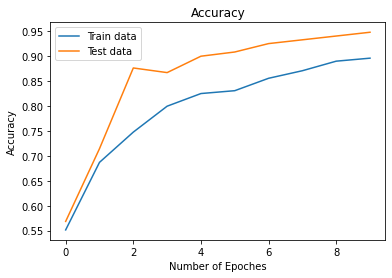

In [7]:
# Graph of accuracies of both train and test datasets
plt.title("Accuracy")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Number of Epoches')
plt.ylabel('Accuracy')
plt.legend(['Train data','Test data'])

plt.show()

In [8]:
# Save the model 
model.save("gestures_cnn.h5")
model = load_model('gestures_cnn.h5')

In [9]:
def getLetter(result):
    labels = { 
        0: 'A',
        1: 'B',
        2: 'C',
        3: 'D',
        4: 'E',
        5: 'F',
        6: 'G',
        7: 'H',
        8: 'I',
        9: 'J',
        10: 'K',
        11: 'L',
        12: 'M',
        13: 'N',
        14: 'O',
        15: 'P',
        16: 'Q',
        17: 'R',
        18: 'S',
        19: 'T',
        20: 'U',
        21: 'V',
        22: 'W',
        23: 'X',
        24: 'Y',
        25: 'Z' }
    try:
        res = int(result)
        return labels[res]
    except:
        return "Something went wrong :/"

In [10]:
cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    frame_copy = frame.copy()

    roi = frame[100:300, 350:550]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (img_size, img_size), interpolation = cv2.INTER_AREA)
    cv2.imshow('roi - gray', roi)

    cv2.rectangle(frame_copy, (350, 100), (550, 300), (255,0,0), 5)
    
    roi = roi.reshape(1,img_size,img_size,1) 

    roi = roi/255
    result = str(np.argmax(model.predict(roi, 1, verbose = 0)[0]))

    cv2.putText(frame_copy, getLetter(result), (300 , 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('Frame', frame_copy)    
    
    if cv2.waitKey(1) == 13: # Enter-Key to stop
        break
        
cap.release()
cv2.destroyAllWindows() 

KeyboardInterrupt: 

: 